Average User Rating: 96.48494983277592


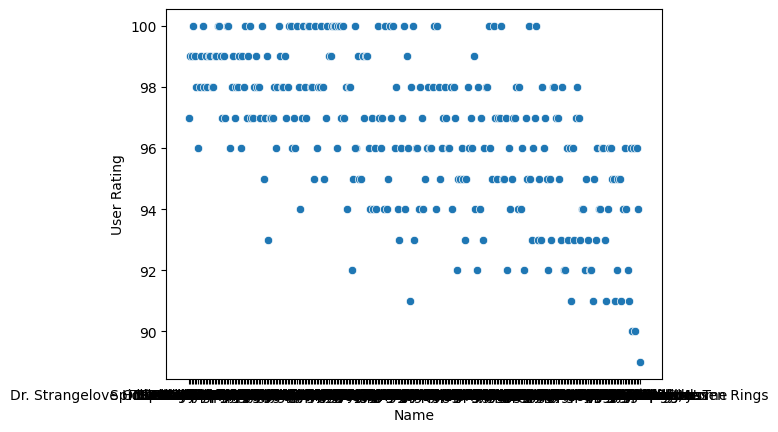

In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import seaborn as se

class Rotten_tomatoes:
    def main(self):
        url = 'https://editorial.rottentomatoes.com/guide/best-movies-of-all-time/'
        headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
        }
        response = requests.get(url, headers=headers)
        
        soup = BeautifulSoup(response.text, 'html.parser')

        name = soup.find_all('a', class_='title')
        release_date = soup.find_all('span', class_='year')
        user_rating = soup.find_all('span', class_='score')

        with open('movie.csv', 'w', newline='', encoding='utf-8') as file:
            file.write('Name,Release Date,User Rating\n')  # Write the header
            for n, r, u in zip(name, release_date, user_rating):
                row = f'"{n.get_text(strip=True)}","{r.get_text(strip=True)}","{u.get_text(strip=True)}"\n'
                file.write(row)  # Write each row

        # Read the CSV file into a DataFrame
        dataFM = pd.read_csv('movie.csv')  
        dataFM['User Rating'] = pd.to_numeric(dataFM['User Rating'].str.replace('%', ''), errors='coerce')  # Remove '%' and convert to numeric
        average_rating = np.average(dataFM['User Rating'].dropna())  # Drop NaN values and calculate average
        print(f"Average User Rating: {average_rating}")  # Print the average rating
       
        # visualize the movie data
        se.scatterplot(data=dataFM, x='Name', y='User Rating')

if __name__ == '__main__':
    cls = Rotten_tomatoes()
    cls.main()
        